Data Cleaning: Deep Learning Framework for Option Pricing

Author: Kyle Rytand Bistrain

Date: September 2025

Install Packages
Python 3.12.4

In [ ]:
%matplotlib inline
from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yfinance as yf
import pandas_market_calendars as mcal
from scipy.stats import norm, skew, kurtosis

Convert simple yields to continuous compounded rates

In [2]:
def convert_simple_yield_to_continuous(simple_yield, T):
    return np.log(1 + simple_yield*T)/T

Read in 3-Month Risk Free Interest Rate from FRED

In [3]:
rf3 = pd.read_csv(
    '/Users/kylebistrain/Documents/STATISTICS MASTERS/Masters_Thesis_Data/DGS3MO.csv',
    na_values='.',
    parse_dates=['DATE']           
)
rf3['DGS3MO'] = rf3['DGS3MO']/100
rf3['DGS3MO'] = convert_simple_yield_to_continuous(rf3['DGS3MO'], 0.25)
print(rf3.head())
print(rf3[rf3['DGS3MO'].isna()])

        DATE  DGS3MO
0 2012-02-01  0.0006
1 2012-02-02  0.0008
2 2012-02-03  0.0008
3 2012-02-06  0.0008
4 2012-02-07  0.0008
           DATE  DGS3MO
13   2012-02-20     NaN
83   2012-05-28     NaN
110  2012-07-04     NaN
153  2012-09-03     NaN
178  2012-10-08     NaN
...         ...     ...
3108 2024-01-01     NaN
3118 2024-01-15     NaN
3143 2024-02-19     NaN
3172 2024-03-29     NaN
3213 2024-05-27     NaN

[132 rows x 2 columns]


Visualization of 3 Month Interest Rate

/opt/anaconda3/lib/python3.12/site-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


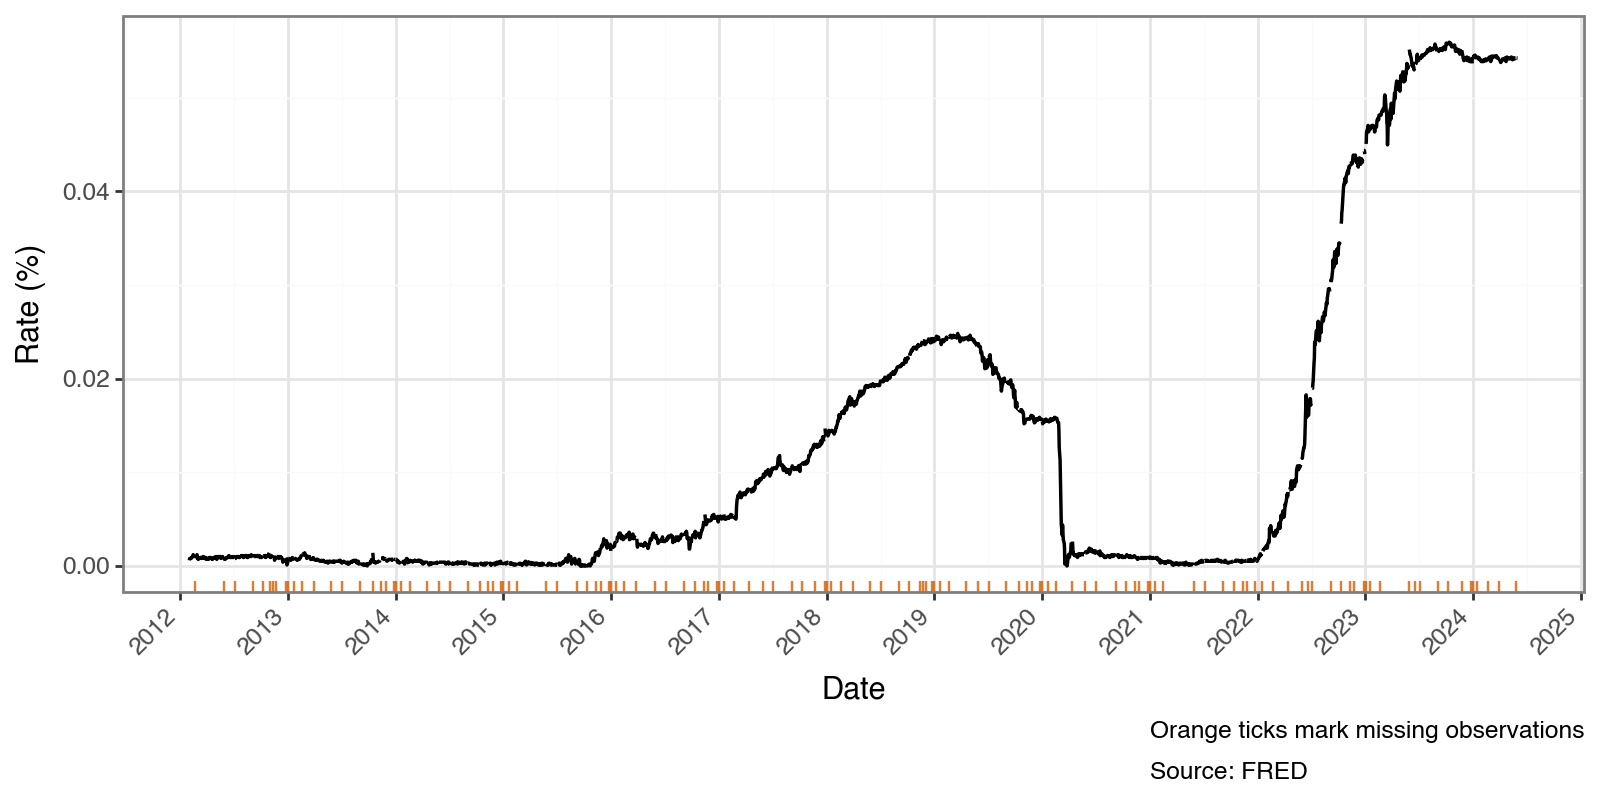

In [4]:
from plotnine import ggplot, aes, geom_line, geom_rug, scale_x_datetime, labs, theme_bw, theme, element_text

p = (
    ggplot(rf3, aes('DATE','DGS3MO'))
    + geom_line(size=0.7)
    + geom_rug(
        data=rf3[rf3['DGS3MO'].isna()],
        sides='b', length=0.02,
        color='#D55E00', alpha=0.8
    )
    + scale_x_datetime(date_breaks='1 year', date_labels='%Y')
    + labs(
         subtitle='',
         x='Date', y='Rate (%)',
         caption='Orange ticks mark missing observations\n\nSource: FRED'
      )
    + theme_bw()
    + theme(
         axis_text_x=element_text(rotation=45, hjust=1),
         figure_size=(8,4)
      )
)

p

Read in 6-Month Risk Free Interest Rate from FRED

In [5]:
rf6 = pd.read_csv(
    '/Users/kylebistrain/Documents/STATISTICS MASTERS/Masters_Thesis_Data/DGS6MO.csv',
    na_values='.',
    parse_dates=['observation_date']           
)
rf6['DGS6MO'] = rf6['DGS6MO']/100
rf6['DGS6MO'] = convert_simple_yield_to_continuous(rf6['DGS6MO'], 0.5)
print(rf6.head())
print(rf6[rf6['DGS6MO'].isna()])

  observation_date  DGS6MO
0       2012-02-01  0.0009
1       2012-02-02  0.0010
2       2012-02-03  0.0010
3       2012-02-06  0.0010
4       2012-02-07  0.0011
     observation_date  DGS6MO
13         2012-02-20     NaN
83         2012-05-28     NaN
110        2012-07-04     NaN
153        2012-09-03     NaN
178        2012-10-08     NaN
...               ...     ...
3108       2024-01-01     NaN
3118       2024-01-15     NaN
3143       2024-02-19     NaN
3172       2024-03-29     NaN
3213       2024-05-27     NaN

[132 rows x 2 columns]


Visualization of 6 Month Interest Rate

/opt/anaconda3/lib/python3.12/site-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


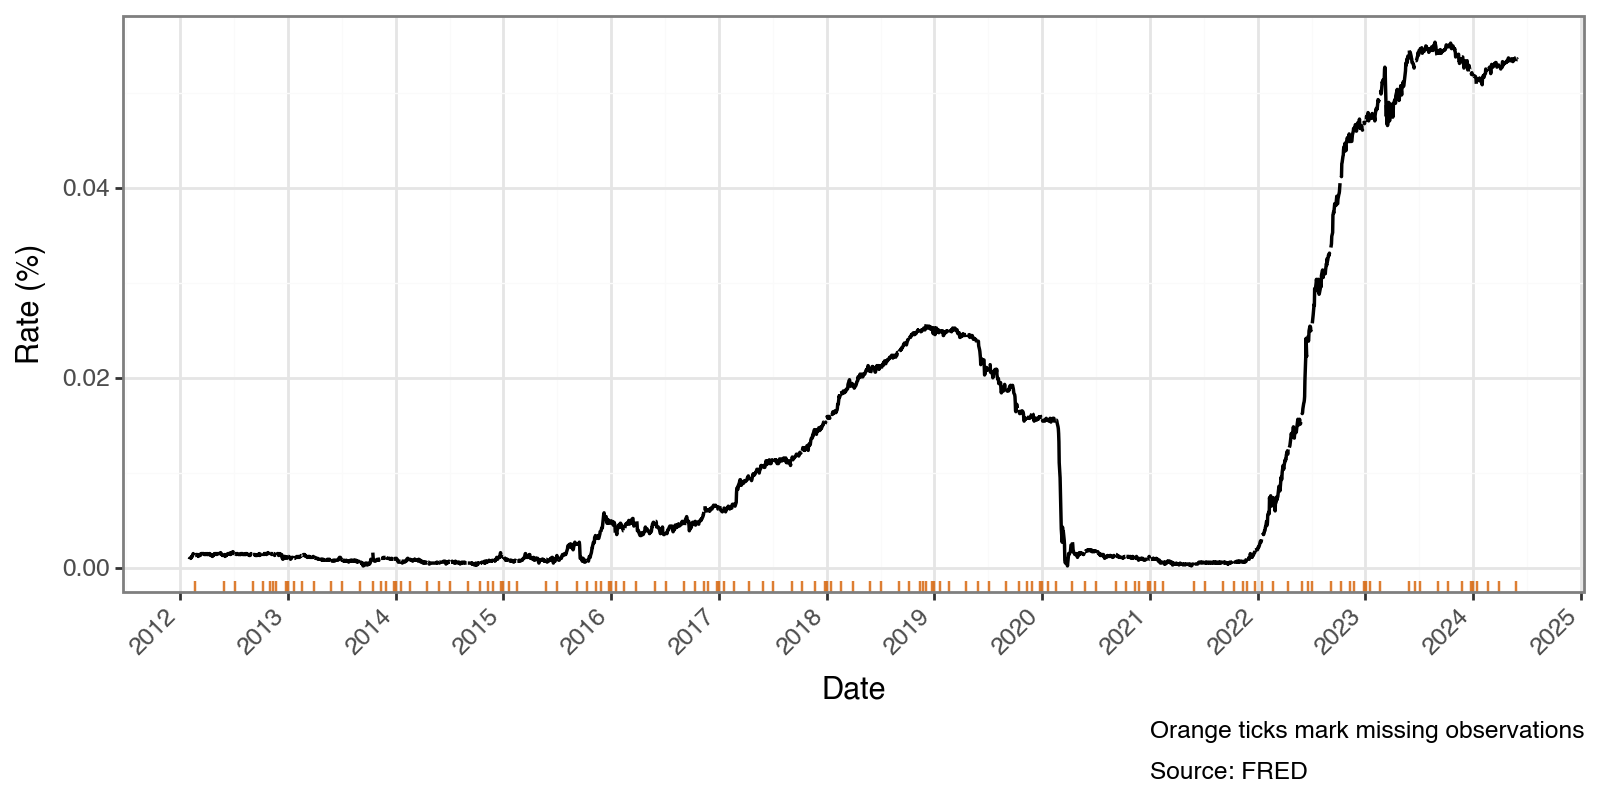

In [ ]:

p = (
    ggplot(rf6, aes('observation_date','DGS6MO'))
    + geom_line(size=0.7)
    + geom_rug(
        data=rf6[rf6['DGS6MO'].isna()],
        sides='b', length=0.02,
        color='#D55E00', alpha=0.8
    )
    + scale_x_datetime(date_breaks='1 year', date_labels='%Y')
    + labs(
         x='Date', y='Rate (%)',
         caption='Orange ticks mark missing observations\n\nSource: FRED'
      )
    + theme_bw()
    + theme(
         axis_text_x=element_text(rotation=45, hjust=1),
         figure_size=(8,4)
      )
)

p

Read in 1 year Risk Free Interest Rate from FRED

In [7]:
rf1 = pd.read_csv(
    '/Users/kylebistrain/Documents/STATISTICS MASTERS/Masters_Thesis_Data/DGS1.csv',
    na_values='.',
    parse_dates=['observation_date']           
)
rf1['DGS1'] = rf1['DGS1']/100
rf1['DGS1'] = convert_simple_yield_to_continuous(rf1['DGS1'], 1)
print(rf1.head())
print(rf1[rf1['DGS1'].isna()])

  observation_date      DGS1
0       2012-02-01  0.001299
1       2012-02-02  0.001399
2       2012-02-03  0.001399
3       2012-02-06  0.001399
4       2012-02-07  0.001399
     observation_date  DGS1
13         2012-02-20   NaN
83         2012-05-28   NaN
110        2012-07-04   NaN
153        2012-09-03   NaN
178        2012-10-08   NaN
...               ...   ...
3108       2024-01-01   NaN
3118       2024-01-15   NaN
3143       2024-02-19   NaN
3172       2024-03-29   NaN
3213       2024-05-27   NaN

[132 rows x 2 columns]


Visualization of 1 Year Interest Rate

/opt/anaconda3/lib/python3.12/site-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


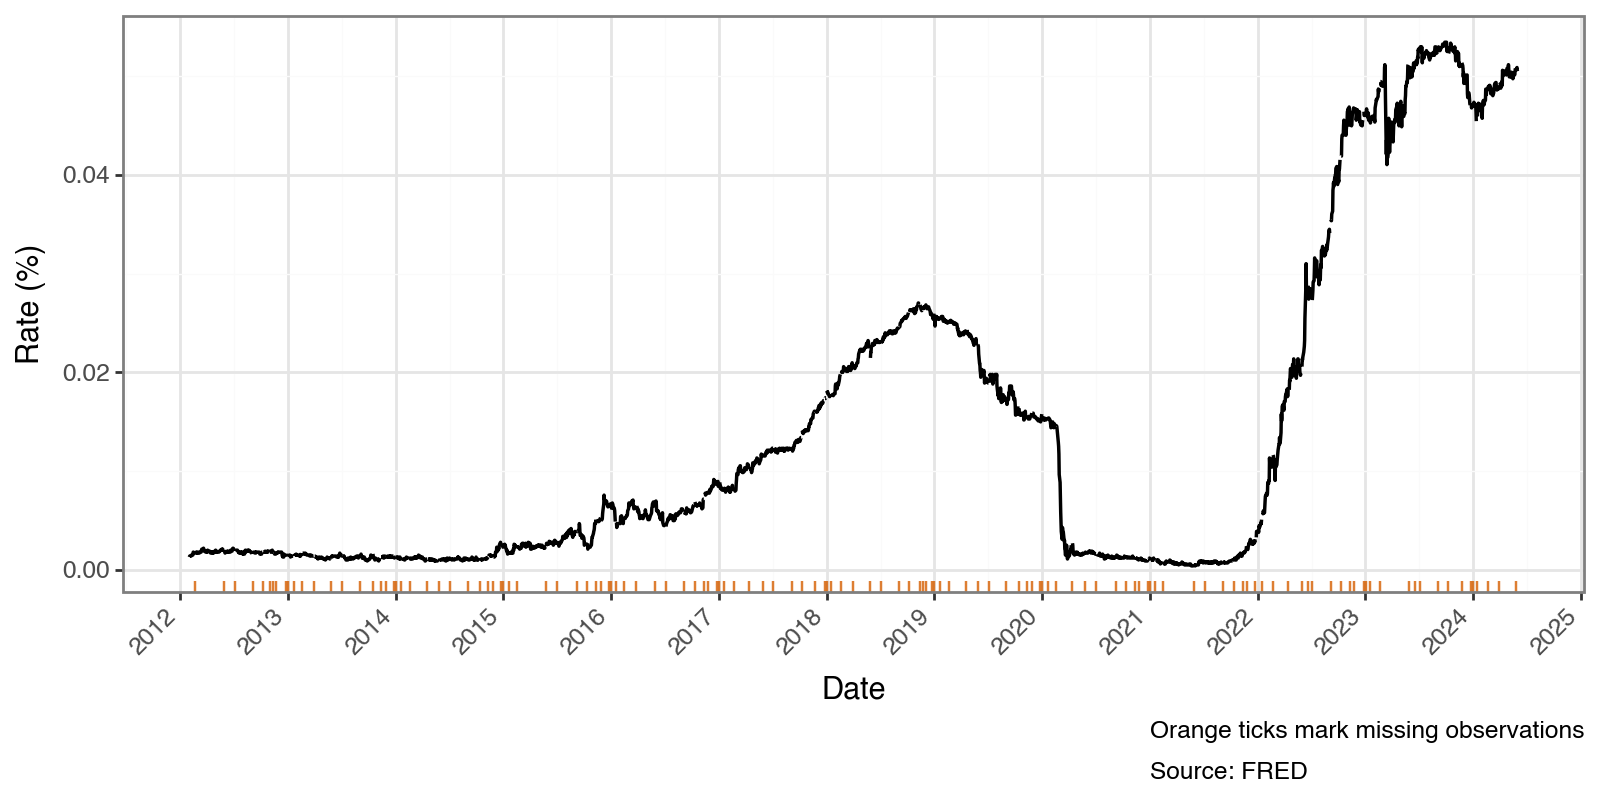

In [8]:
from plotnine import ggplot, aes, geom_line, geom_rug, scale_x_datetime, labs, theme_bw, theme, element_text

p = (
    ggplot(rf1, aes('observation_date','DGS1'))
    + geom_line(size=0.7)
    + geom_rug(
        data=rf1[rf1['DGS1'].isna()],
        sides='b', length=0.02,
        color='#D55E00', alpha=0.8
    )
    + scale_x_datetime(date_breaks='1 year', date_labels='%Y')
    + labs(
         x='Date', y='Rate (%)',
         caption='Orange ticks mark missing observations\n\nSource: FRED'
      )
    + theme_bw()
    + theme(
         axis_text_x=element_text(rotation=45, hjust=1),
         figure_size=(8,4)
      )
)

p

Read in SPY Option Dataset from Delta Neutral (historicaloptiondata.com)

In [35]:
def read_all_csv_files(directory_path):
    
    all_data = []
    
    
    for filename in sorted(os.listdir(directory_path)):
        
        if filename.startswith("SPY_") and filename.endswith(".csv") and "to" in filename:
            file_path = os.path.join(directory_path, filename)
            print(f"Reading file: {file_path}")
            df = pd.read_csv(file_path,na_values=[".", "", "NA","NaN", "N/A", "?"])
            all_data.append(df)

    
    combined_data = pd.concat(all_data, ignore_index=True)
    
    return combined_data

directory_path = '/Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/'

combined_data = read_all_csv_files(directory_path)

print(combined_data.head())


Reading file: /Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/SPY_20120201_to_20120229.csv
Reading file: /Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/SPY_20120301_to_20120330.csv
Reading file: /Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/SPY_20120402_to_20120430.csv
Reading file: /Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/SPY_20120501_to_20120531.csv
Reading file: /Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/SPY_20120601_to_20120629.csv
Reading file: /Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/SPY_20120702_to_20120731.csv
Reading file: /Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/SPY_20120801_to_20120831.csv
Reading file: /Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/SPY_20120904_to_20120928.csv
Reading file: /Users/kylebistrain/Documents/GREENCANVAS2024/Batch_45WQP5WXK5/SPY_20121001_to_20121031.csv
Reading file: /Users/kylebistrain/Documents/GR

In [38]:
combined_data['optionroot'].nunique()

383449

In [10]:
combined_data['expiration'] = pd.to_datetime(combined_data['expiration'], format='%m/%d/%Y')
combined_data['quotedate'] = pd.to_datetime(combined_data['quotedate'], format='%m/%d/%Y')

Vizualization of SPY Prices from 2012-2024

[]

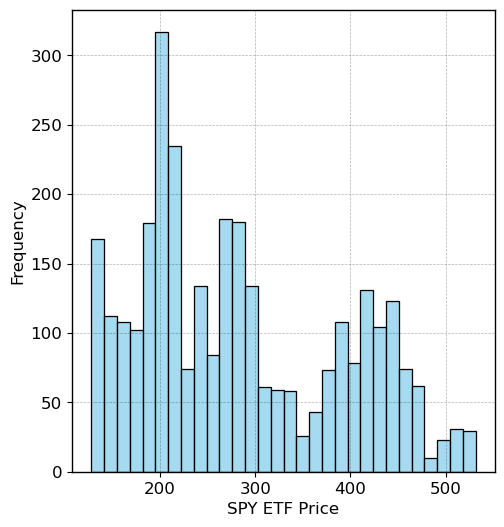

In [11]:
from scipy.stats import lognorm

def apply_theme_bw():
    plt.rcParams.update({
        'axes.facecolor': 'white',
        'figure.facecolor': 'white',
        'axes.edgecolor': 'black',
        'axes.linewidth': 1,
        'grid.color': 'black',
        'grid.linestyle': '--',
        'grid.linewidth': 0.5,
        'xtick.color': 'black',
        'ytick.color': 'black',
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'legend.fontsize': 12
    })

apply_theme_bw()

# # Group by quotedate to take the last price
# df_daily_prices = combined_data.groupby('quotedate')['underlying_last'].last().reset_index()

# # Calculate simple returns
# df_daily_prices['simple_return'] = df_daily_prices['underlying_last'].pct_change()

# # Calculate Log returns
# df_daily_prices['log_return'] = np.log(df_daily_prices['underlying_last']).diff()


spy_prices = yf.download(
    "SPY",
    start="2012-02-01",
    end="2024-05-31",
    auto_adjust=False,
    progress=False
)

spy_prices.columns = spy_prices.columns.droplevel('Ticker')

# Compute log returns
spy_prices["logret"] = np.log(spy_prices["Adj Close"] / spy_prices["Adj Close"].shift(1))

# Plotting the Price Distribution

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
# Distribution of Prices
sns.histplot(spy_prices['Close'], kde=False, bins = 30, color='skyblue')
#plt.title('Distribution of End of Day SPY ETF Prices', fontsize = 12)
plt.xlabel('SPY ETF Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.grid(True, alpha=0.3)
plt.plot()


Log Returns Distribution without Dividends from 2012-2024

Date
2012-02-02    0.001584
2012-02-03    0.013922
2012-02-06   -0.000669
2012-02-07    0.002526
2012-02-08    0.002963
                ...   
2024-05-23   -0.007331
2024-05-24    0.006595
2024-05-28    0.000699
2024-05-29   -0.007027
2024-05-30   -0.006656
Name: logret, Length: 3101, dtype: float64


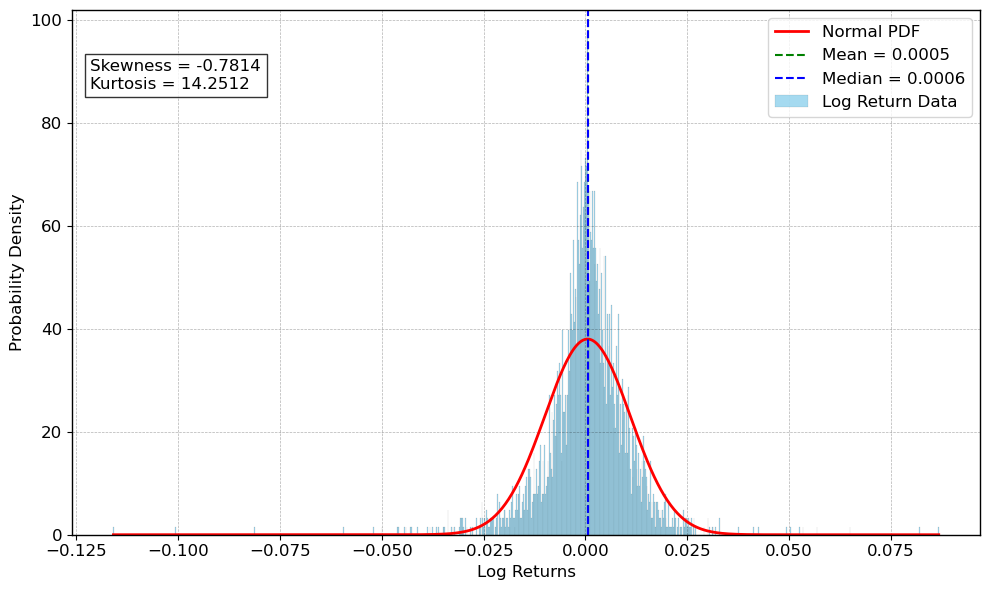

In [ ]:

def apply_theme_bw():
    plt.rcParams.update({
        'axes.facecolor': 'white',
        'figure.facecolor': 'white',
        'axes.edgecolor': 'black',
        'axes.linewidth': 1,
        'grid.color': 'black',
        'grid.linestyle': '--',
        'grid.linewidth': 0.5,
        'xtick.color': 'black',
        'ytick.color': 'black',
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'legend.fontsize': 12
    })

apply_theme_bw()

log_returns = spy_prices['logret'].dropna()

print(log_returns)

mu = log_returns.mean()
sigma = log_returns.std()
data_skewness = skew(log_returns)
data_kurtosis = kurtosis(log_returns)

# Generate values for normal PDF
x = np.linspace(log_returns.min(), log_returns.max(), 500)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Plot the normal PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'r-', label='Normal PDF', linewidth=2)

sns.histplot(log_returns, kde=False, color='skyblue', stat='density', bins=1000, label='Log Return Data')
plt.axvline(mu, color='green', linestyle='--', linewidth=1.5, label=f'Mean = {mu:.4f}')
plt.axvline(log_returns.median(), color='blue', linestyle='--', linewidth=1.5, label=f'Median = {log_returns.median():.4f}')
plt.text(
    0.02, 0.85,  # Adjust position to avoid clash (move it down)
    f"Skewness = {data_skewness:.4f}\nKurtosis = {data_kurtosis:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)

#plt.title('SPY ETF Log Return Distribution with Fitted Normal PDF', fontsize=14, fontweight='bold', pad=20)  # Add padding
plt.xlabel('Log Returns', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
combined_data.head(1000)

,underlying,underlying_last,exchange,optionroot,optionext,type,expiration,quotedate,strike,last,...,volume,openinterest,impliedvol,delta,gamma,theta,vega,optionalias,IVBid,IVAsk
0,SPY,132.47,W,SPY120203C00120000,NaN,call,2012-02-03,2012-02-01,120.0,12.70,...,85,120,0.2847,0.9998,0.0000,8.4114,0.0000,SPY120203C00120000,0.0000,0.8934
1,SPY,132.47,W,SPY120203P00120000,NaN,put,2012-02-03,2012-02-01,120.0,0.02,...,0,5775,0.3234,0.0000,0.0000,-0.0004,0.0000,SPY120203P00120000,0.0000,0.6530
2,SPY,132.47,W,SPY120203C00121000,NaN,call,2012-02-03,2012-02-01,121.0,11.76,...,104,115,0.2847,0.9998,0.0000,8.4062,0.0000,SPY120203C00121000,0.0000,0.8467
3,SPY,132.47,W,SPY120203P00121000,NaN,put,2012-02-03,2012-02-01,121.0,0.01,...,0,9793,0.3234,0.0000,0.0000,-0.0031,0.0001,SPY120203P00121000,0.0000,0.6039
4,SPY,132.47,W,SPY120203C00122000,NaN,call,2012-02-03,2012-02-01,122.0,10.40,...,25,86,0.2847,0.9998,0.0000,8.4000,0.0000,SPY120203C00122000,0.0000,0.7682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SPY,132.47,*,SPY120519P00085000,NaN,put,2012-05-19,2012-02-01,85.0,0.20,...,0,4,0.3971,-0.0155,0.0014,-1.9068,2.7968,SPY120519P00085000,0.3899,0.4043
996,SPY,132.47,*,SPY120519C00086000,NaN,call,2012-05-19,2012-02-01,86.0,0.00,...,0,0,0.4621,0.9629,0.0022,-2.7056,5.2678,SPY120519C00086000,0.4450,0.4791
997,SPY,132.47,*,SPY120519P00086000,NaN,put,2012-05-19,2012-02-01,86.0,0.00,...,0,0,0.3912,-0.0165,0.0015,-1.9859,2.9560,SPY120519P00086000,0.3845,0.3980
998,SPY,132.47,*,SPY120519C00087000,NaN,call,2012-05-19,2012-02-01,87.0,0.00,...,0,0,0.4531,0.9617,0.0023,-2.7479,5.4190,SPY120519C00087000,0.4365,0.4696


Compute Number of trading days in a year (Optional)

In [ ]:
# from datetime import datetime
# import pandas as pd
# import pandas_market_calendars as mcal
# nyse = mcal.get_calendar('NYSE')
# records = []
# for year in range(2012, 2025):
#     start = f"{year}-01-01"
#     end   = f"{year}-12-31"
#     # valid_days returns a DatetimeIndex of all market‐open timestamps
#     days_index = nyse.valid_days(start_date=start, end_date=end)
    
#     records.append({
#         "year": year,
#         "trading_days": days_index,
#         "count": len(days_index)
#     })
# counts_df = pd.DataFrame([
#     {"year": rec["year"], "n_trading_days": rec["count"]}
#     for rec in records
# ])
# print(counts_df)

Compute trading days until expiry

T = # trading days / 252 NYSE trading days

In [ ]:
combined_data['quotedate']  = pd.to_datetime(combined_data['quotedate']).dt.date
combined_data['expiration'] = pd.to_datetime(combined_data['expiration']).dt.date

nyse = mcal.get_calendar('NYSE')

pairs = (
    combined_data
    .loc[:, ['quotedate','expiration']]
    .drop_duplicates()
    .reset_index(drop=True)
)

def count_td_to_expiry(row):
    days = nyse.valid_days(
        start_date=row['quotedate'].isoformat(),
        end_date  =row['expiration'].isoformat()
    )
    return len(days) - 1

pairs['td_to_expiry'] = pairs.apply(count_td_to_expiry, axis=1)

combined_data = combined_data.merge(
    pairs,
    on=['quotedate','expiration'],
    how='left'
)

combined_data['T'] = combined_data['td_to_expiry'] / 252

print("Still missing td_to_expiry:", combined_data['td_to_expiry'].isna().sum())


Still missing td_to_expiry: 0


Checks Number for Trading Days between dates (Optional)

In [16]:
# nyse.valid_days(start_date='2012-02-01', end_date='2012-03-15').value_counts().sum()


Checks Alignment between SPY data from Historical Option Data versus Yahoo Finance (Optional)

In [ ]:
# yf_df = yf.download(
#     "SPY",
#     start=combined_data['quotedate'].min().strftime("%Y-%m-%d"),
#     end=  (combined_data['quotedate'].max() + pd.Timedelta(days=1)).strftime("%Y-%m-%d"),
#     auto_adjust=False
# )

# if isinstance(yf_df.columns, pd.MultiIndex):
#     # multi-ticker style: (metric, ticker)
#     adj = yf_df[("Close","SPY")]
# else:
#     # flat style (rare with auto_adjust, but just in case)
#     adj = yf_df["Close"]

# adj.name = "y_adj"
# comp = (
#     combined_data
#       .set_index("quotedate")[["underlying_last"]]
#       .join(adj, how="inner")
#       .dropna(subset=["underlying_last","y_adj"])
# )

# comp["match"] = np.isclose(comp["underlying_last"], comp["y_adj"], atol=1e-8)

# n_total    = len(comp)
# n_matching = comp["match"].sum()
# print(f"{n_matching}/{n_total} ({100*n_matching/n_total:.2f}%) match")


In [ ]:
spy_prices = yf.download(
    "SPY",
    start="2009-01-01",
    end="2024-05-31",
    auto_adjust=False,
    progress=False
)

spy_prices.columns = spy_prices.columns.droplevel('Ticker')

# Compute log returns
spy_prices["logret"] = np.log(spy_prices["Adj Close"] / spy_prices["Adj Close"].shift(1))

# Move date from index to a column for the merge
spy_prices = spy_prices.reset_index()
spy_prices["Date"] = pd.to_datetime(spy_prices["Date"]).dt.tz_localize(None)
combined_data['quotedate'] = pd.to_datetime(combined_data['quotedate'])

# Calculate Realized Volatility 
windows = [63, 126, 252]
vol_cols = []
for w in windows:
    col_name = f"logvol{w}_annual"
    vol_cols.append(col_name)
    daily_std = spy_prices["logret"].rolling(window=w).std(ddof=1)
    spy_prices[col_name] = daily_std * np.sqrt(252)


# Merge Volatility into Main DataFrame 
cols_to_merge = ["Date"] + vol_cols
combined_data = combined_data.merge(
    spy_prices[cols_to_merge],
    how="left",
    left_on="quotedate",
    right_on="Date"
).drop(columns=["Date"])


# Handle Missing Values
# Forward-fill NaNs from holidays and weekends
combined_data[vol_cols] = combined_data[vol_cols].fillna(method='ffill')

print(combined_data.tail())
print(combined_data.isnull().sum())

/var/folders/ky/v5tlrtrd1c57gxv6j8wk82lr0000gp/T/ipykernel_11705/314497311.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


         underlying  underlying_last  exchange          optionroot  optionext  \
18685649        SPY           522.61         *  SPY261218P00785000        NaN   
18685650        SPY           522.61         *  SPY261218C00790000        NaN   
18685651        SPY           522.61         *  SPY261218P00790000        NaN   
18685652        SPY           522.61         *  SPY261218C00795000        NaN   
18685653        SPY           522.61         *  SPY261218P00795000        NaN   

          type  expiration  quotedate  strike    last  ...   theta      vega  \
18685649   put  2026-12-18 2024-05-30   785.0  266.70  ... -4.8810  266.0142   
18685650  call  2026-12-18 2024-05-30   790.0    2.92  ... -3.0870   97.8192   
18685651   put  2026-12-18 2024-05-30   790.0    0.00  ... -4.9591  265.7004   
18685652  call  2026-12-18 2024-05-30   795.0    2.35  ... -2.9495   93.5919   
18685653   put  2026-12-18 2024-05-30   795.0    0.00  ... -4.9715  264.9078   

                 optionalias   I

In [ ]:
# df = yf.download(
#     "SPY",
#     start="2010-01-01",
#     end="2024-05-31",
#     auto_adjust=False
# )
# df["logret"] = np.log(df["Close"] / df["Close"].shift(1))

# # Define your look-back windows (in trading days)
# windows = [63, 126, 252]

# for w in windows:
#     #rolling sample std of the daily returns (ddof=1 by default)
#     daily_std = df["logret"].rolling(window=w).std()

#     # annualize: multiply by sqrt(N/252)
#     df[f"logvol{w}_annual"] = daily_std * np.sqrt(w / 252.0)

# # Map into your combined_data by quotedate
# for w in windows:
#     col = f"logvol{w}_annual"
#     combined_data[col] = combined_data["quotedate"].map(df[col])


# # Sanity check: how many NaNs remain?
# print(combined_data[[f"logvol{w}_annual" for w in windows]].isnull().sum())


In [21]:
missing_counts = combined_data.isnull().sum()
print("Missing Value Counts per Column:\n", missing_counts)

Missing Value Counts per Column:
 underlying                 0
underlying_last            0
 exchange                  0
optionroot                 0
optionext           18685654
type                       0
expiration                 0
quotedate                  0
strike                     0
last                       0
bid                        0
ask                        0
volume                     0
openinterest               0
impliedvol                 0
delta                      0
gamma                      0
theta                      0
vega                       0
optionalias                0
IVBid                      0
IVAsk                      0
td_to_expiry               0
T                          0
logvol63_annual            0
logvol126_annual           0
logvol252_annual           0
dtype: int64


In [22]:
combined_data.head(1000)

,underlying,underlying_last,exchange,optionroot,optionext,type,expiration,quotedate,strike,last,...,theta,vega,optionalias,IVBid,IVAsk,td_to_expiry,T,logvol63_annual,logvol126_annual,logvol252_annual
0,SPY,132.47,W,SPY120203C00120000,NaN,call,2012-02-03,2012-02-01,120.0,12.70,...,8.4114,0.0000,SPY120203C00120000,0.0000,0.8934,2,0.007937,0.210879,0.295315,0.230268
1,SPY,132.47,W,SPY120203P00120000,NaN,put,2012-02-03,2012-02-01,120.0,0.02,...,-0.0004,0.0000,SPY120203P00120000,0.0000,0.6530,2,0.007937,0.210879,0.295315,0.230268
2,SPY,132.47,W,SPY120203C00121000,NaN,call,2012-02-03,2012-02-01,121.0,11.76,...,8.4062,0.0000,SPY120203C00121000,0.0000,0.8467,2,0.007937,0.210879,0.295315,0.230268
3,SPY,132.47,W,SPY120203P00121000,NaN,put,2012-02-03,2012-02-01,121.0,0.01,...,-0.0031,0.0001,SPY120203P00121000,0.0000,0.6039,2,0.007937,0.210879,0.295315,0.230268
4,SPY,132.47,W,SPY120203C00122000,NaN,call,2012-02-03,2012-02-01,122.0,10.40,...,8.4000,0.0000,SPY120203C00122000,0.0000,0.7682,2,0.007937,0.210879,0.295315,0.230268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SPY,132.47,*,SPY120519P00085000,NaN,put,2012-05-19,2012-02-01,85.0,0.20,...,-1.9068,2.7968,SPY120519P00085000,0.3899,0.4043,75,0.297619,0.210879,0.295315,0.230268
996,SPY,132.47,*,SPY120519C00086000,NaN,call,2012-05-19,2012-02-01,86.0,0.00,...,-2.7056,5.2678,SPY120519C00086000,0.4450,0.4791,75,0.297619,0.210879,0.295315,0.230268
997,SPY,132.47,*,SPY120519P00086000,NaN,put,2012-05-19,2012-02-01,86.0,0.00,...,-1.9859,2.9560,SPY120519P00086000,0.3845,0.3980,75,0.297619,0.210879,0.295315,0.230268
998,SPY,132.47,*,SPY120519C00087000,NaN,call,2012-05-19,2012-02-01,87.0,0.00,...,-2.7479,5.4190,SPY120519C00087000,0.4365,0.4696,75,0.297619,0.210879,0.295315,0.230268


Read In Dividend Data and create is_ex_date and days_until_next_exdate

In [ ]:
# Load and clean the dividend data
div = (
    pd.read_csv('/Users/kylebistrain/Documents/STATISTICS MASTERS/Masters_Thesis_Data/SPY_DIVIDENDS.csv', 
                parse_dates=['PAYABLE DATE', 'RECORD DATE', 'EX-DATE'])
      .query("TICKER == 'SPY'")
      .loc[:, ['DIVIDEND ($)', 'PAYABLE DATE', 'RECORD DATE', 'EX-DATE']]
      .reset_index(drop=True)
)

# Calculate the trailing twelve-month (TTM) dividend amount
div = div.sort_values('EX-DATE')
div['rolling_dividend'] = div['DIVIDEND ($)'].rolling(window=4).sum()

# Prepare and merge the dividend data with the main price data
# sort values
combined_data['quotedate'] = pd.to_datetime(combined_data['quotedate'])
combined_data.sort_values('quotedate', inplace=True)

combined_data_d = pd.merge_asof(
    combined_data,
    div[['EX-DATE', 'rolling_dividend']],
    left_on='quotedate',
    right_on='EX-DATE',
    direction='backward'
)

# Calculate the simple dividend yield (y)
combined_data_d['dividend_yield'] = combined_data_d['rolling_dividend'] / combined_data_d['underlying_last']

# Convert to a continuously compounded rate (q)
combined_data_d['continuous_dividend_rate'] = np.log(1 + combined_data_d['dividend_yield'])


combined_data_d['is_ex_date'] = (
    combined_data_d['quotedate'] == combined_data_d['EX-DATE']
).astype(int)

combined_data_d['next_ex_date'] = pd.merge_asof(
    combined_data,
    div,
    left_on='quotedate',
    right_on='EX-DATE',
    direction='forward'
)['EX-DATE']


# Calculate Trading Days Until Next Ex-Date 

nyse = mcal.get_calendar('NYSE')
nyse_holidays = nyse.holidays().holidays

mask = combined_data_d['next_ex_date'].notna()

start_dates = combined_data_d.loc[mask, 'quotedate'].values.astype('datetime64[D]')
end_dates = combined_data_d.loc[mask, 'next_ex_date'].values.astype('datetime64[D]')

trading_days = np.busday_count(start_dates, end_dates, holidays=nyse_holidays)

combined_data_d['days_until_ex_date'] = np.nan
combined_data_d.loc[mask, 'days_until_ex_date'] = trading_days


print(combined_data_d[['quotedate','underlying_last', 'rolling_dividend', 'dividend_yield', 'continuous_dividend_rate', 'is_ex_date','days_until_ex_date']].head())


   quotedate  underlying_last  rolling_dividend  dividend_yield  \
0 2012-02-01           132.47          2.576024        0.019446   
1 2012-02-01           132.47          2.576024        0.019446   
2 2012-02-01           132.47          2.576024        0.019446   
3 2012-02-01           132.47          2.576024        0.019446   
4 2012-02-01           132.47          2.576024        0.019446   

   continuous_dividend_rate  is_ex_date  days_until_ex_date  
0                  0.019259           0                31.0  
1                  0.019259           0                31.0  
2                  0.019259           0                31.0  
3                  0.019259           0                31.0  
4                  0.019259           0                31.0  


Filter Time to Expiry

In [24]:
# allow a small window around 60 - 66 for 3 months, 123 to 129 for 6 month, 249 to 255 for 1 year

filtered_df3 = combined_data_d[
    combined_data_d['td_to_expiry'].between(60, 66)
]
filtered_df6 = combined_data_d[
    combined_data_d['td_to_expiry'].between(123, 129)
]

filtered_df1 = combined_data_d[
    combined_data_d['td_to_expiry'].between(249, 255)
]

Read in VIX

In [25]:
VIX3m = yf.download(
    "^VIX3M",
    start="2012-02-01",
    end="2024-05-31",
    auto_adjust=True  
)

VIX3m.columns = VIX3m.columns.droplevel(1)  # Flatten the column names
VIX3m.reset_index(inplace=True)           # Make Date a column instead of index

vix_3m_close = VIX3m[["Date", "Close"]]      # Extract Date and Close columns

print(vix_3m_close.head(10))

vix_3m_close['Close'].isna().sum()

[*********************100%***********************]  1 of 1 completed

Price       Date      Close
0     2012-02-01  21.540001
1     2012-02-02  21.010000
2     2012-02-03  20.049999
3     2012-02-06  20.389999
4     2012-02-07  20.139999
5     2012-02-08  20.680000
6     2012-02-09  21.340000
7     2012-02-10  23.280001
8     2012-02-13  22.120001
9     2012-02-14  22.820000


0

In [26]:
VIX6m = yf.download(
    "^VIX6M",
    start="2012-02-01",
    end="2024-05-31",
    auto_adjust=True  
)

VIX6m.columns = VIX6m.columns.droplevel(1)  # Flatten the column names
VIX6m.reset_index(inplace=True)           # Make Date a column instead of index

vix_6m_close = VIX6m[["Date", "Close"]]      # Extract Date and Close columns

print(vix_6m_close.head(10))
vix_6m_close['Close'].isna().sum()

[*********************100%***********************]  1 of 1 completed

Price       Date      Close
0     2012-02-01  24.370001
1     2012-02-02  23.889999
2     2012-02-03  23.000000
3     2012-02-06  23.110001
4     2012-02-07  22.850000
5     2012-02-08  23.139999
6     2012-02-09  23.770000
7     2012-02-10  25.170000
8     2012-02-13  24.469999
9     2012-02-14  25.219999


0

In [28]:
filtered_df3['quotedate'] = pd.to_datetime(filtered_df3['quotedate'], errors='coerce')
rf3['DATE'] = pd.to_datetime(rf3['DATE'], errors='coerce')
vix_3m_close['Date'] = pd.to_datetime(vix_3m_close['Date'], errors='coerce')

print("NaT values in 'quotedate' column:", filtered_df3['quotedate'].isna().sum())
print("NaT values in 'DATE' column:", rf3['DATE'].isna().sum())
print("NaT values in 'DATE' column:", vix_3m_close['Date'].isna().sum())

merged_df3 = filtered_df3.merge(rf3, how='left', left_on='quotedate', right_on='DATE')
merged_df3 = merged_df3.merge(vix_3m_close, how='left', left_on='quotedate', right_on='Date')
merged_df3.head()

/var/folders/ky/v5tlrtrd1c57gxv6j8wk82lr0000gp/T/ipykernel_11705/793475988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/ky/v5tlrtrd1c57gxv6j8wk82lr0000gp/T/ipykernel_11705/793475988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NaT values in 'quotedate' column: 0
NaT values in 'DATE' column: 0
NaT values in 'DATE' column: 0


,underlying,underlying_last,exchange,optionroot,optionext,type,expiration,quotedate,strike,last,...,rolling_dividend,dividend_yield,continuous_dividend_rate,is_ex_date,next_ex_date,days_until_ex_date,DATE,DGS3MO,Date,Close
0,SPY,135.19,*,SPY120519P00115000,NaN,put,2012-05-19,2012-02-14,115.0,1.35,...,2.576024,0.019055,0.018876,0,2012-03-16,22.0,2012-02-14,0.0012,2012-02-14,22.82
1,SPY,135.19,*,SPY120519C00116000,NaN,call,2012-05-19,2012-02-14,116.0,19.32,...,2.576024,0.019055,0.018876,0,2012-03-16,22.0,2012-02-14,0.0012,2012-02-14,22.82
2,SPY,135.19,*,SPY120519P00116000,NaN,put,2012-05-19,2012-02-14,116.0,1.28,...,2.576024,0.019055,0.018876,0,2012-03-16,22.0,2012-02-14,0.0012,2012-02-14,22.82
3,SPY,135.19,*,SPY120519C00117000,NaN,call,2012-05-19,2012-02-14,117.0,18.42,...,2.576024,0.019055,0.018876,0,2012-03-16,22.0,2012-02-14,0.0012,2012-02-14,22.82
4,SPY,135.19,*,SPY120519P00117000,NaN,put,2012-05-19,2012-02-14,117.0,1.56,...,2.576024,0.019055,0.018876,0,2012-03-16,22.0,2012-02-14,0.0012,2012-02-14,22.82


In [29]:
filtered_df6['quotedate'] = pd.to_datetime(filtered_df6['quotedate'], errors='coerce')
rf6['observation_date'] = pd.to_datetime(rf6['observation_date'], errors='coerce')
vix_6m_close['Date'] = pd.to_datetime(vix_6m_close['Date'], errors='coerce')

print("NaT values in 'quotedate' column:", filtered_df6['quotedate'].isna().sum())
print("NaT values in 'DATE' column:", rf6['observation_date'].isna().sum())
print("NaT values in 'DATE' column:", vix_6m_close['Date'].isna().sum())

merged_df6 = filtered_df6.merge(rf6, how='left', left_on='quotedate', right_on='observation_date')
merged_df6 = merged_df6.merge(vix_6m_close, how='left', left_on='quotedate', right_on='Date')


merged_df6.head()

NaT values in 'quotedate' column: 0
NaT values in 'DATE' column: 0
NaT values in 'DATE' column: 0


/var/folders/ky/v5tlrtrd1c57gxv6j8wk82lr0000gp/T/ipykernel_11705/2197841944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/ky/v5tlrtrd1c57gxv6j8wk82lr0000gp/T/ipykernel_11705/2197841944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,underlying,underlying_last,exchange,optionroot,optionext,type,expiration,quotedate,strike,last,...,rolling_dividend,dividend_yield,continuous_dividend_rate,is_ex_date,next_ex_date,days_until_ex_date,observation_date,DGS6MO,Date,Close
0,SPY,140.44,*,SPY120922P00107000,NaN,put,2012-09-22,2012-03-20,107.0,1.39,...,2.636594,0.018774,0.0186,0,2012-06-15,61.0,2012-03-20,0.001499,2012-03-20,22.49
1,SPY,140.44,*,SPY120922P00055000,NaN,put,2012-09-22,2012-03-20,55.0,0.06,...,2.636594,0.018774,0.0186,0,2012-06-15,61.0,2012-03-20,0.001499,2012-03-20,22.49
2,SPY,140.44,*,SPY120922P00097000,NaN,put,2012-09-22,2012-03-20,97.0,0.95,...,2.636594,0.018774,0.0186,0,2012-06-15,61.0,2012-03-20,0.001499,2012-03-20,22.49
3,SPY,140.44,*,SPY120922C00098000,NaN,call,2012-09-22,2012-03-20,98.0,43.10,...,2.636594,0.018774,0.0186,0,2012-06-15,61.0,2012-03-20,0.001499,2012-03-20,22.49
4,SPY,140.44,*,SPY120922P00098000,NaN,put,2012-09-22,2012-03-20,98.0,0.94,...,2.636594,0.018774,0.0186,0,2012-06-15,61.0,2012-03-20,0.001499,2012-03-20,22.49


In [30]:
filtered_df1['quotedate'] = pd.to_datetime(filtered_df1['quotedate'], errors='coerce')
rf1['observation_date'] = pd.to_datetime(rf1['observation_date'], errors='coerce')
vix_6m_close['Date'] = pd.to_datetime(vix_6m_close['Date'], errors='coerce')

print("NaT values in 'quotedate' column:", filtered_df1['quotedate'].isna().sum())
print("NaT values in 'DATE' column:", rf1['observation_date'].isna().sum())
print("NaT values in 'DATE' column:", vix_6m_close['Date'].isna().sum())

merged_df1 = filtered_df1.merge(rf1, how='left', left_on='quotedate', right_on='observation_date')
merged_df1 = merged_df1.merge(vix_6m_close, how='left', left_on='quotedate', right_on='Date')
merged_df1.head()

/var/folders/ky/v5tlrtrd1c57gxv6j8wk82lr0000gp/T/ipykernel_11705/3791619971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/ky/v5tlrtrd1c57gxv6j8wk82lr0000gp/T/ipykernel_11705/3791619971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NaT values in 'quotedate' column: 0
NaT values in 'DATE' column: 0
NaT values in 'DATE' column: 0


,underlying,underlying_last,exchange,optionroot,optionext,type,expiration,quotedate,strike,last,...,rolling_dividend,dividend_yield,continuous_dividend_rate,is_ex_date,next_ex_date,days_until_ex_date,observation_date,DGS1,Date,Close
0,SPY,133.47,*,SPY130622P00180000,NaN,put,2013-06-22,2012-06-14,180.0,0.00,...,2.636594,0.019754,0.019562,0,2012-06-15,1.0,2012-06-14,0.001798,2012-06-14,26.969999
1,SPY,133.47,*,SPY130622P00149000,NaN,put,2013-06-22,2012-06-14,149.0,0.00,...,2.636594,0.019754,0.019562,0,2012-06-15,1.0,2012-06-14,0.001798,2012-06-14,26.969999
2,SPY,133.47,*,SPY130622C00150000,NaN,call,2013-06-22,2012-06-14,150.0,3.58,...,2.636594,0.019754,0.019562,0,2012-06-15,1.0,2012-06-14,0.001798,2012-06-14,26.969999
3,SPY,133.47,*,SPY130622P00150000,NaN,put,2013-06-22,2012-06-14,150.0,0.00,...,2.636594,0.019754,0.019562,0,2012-06-15,1.0,2012-06-14,0.001798,2012-06-14,26.969999
4,SPY,133.47,*,SPY130622C00151000,NaN,call,2013-06-22,2012-06-14,151.0,2.93,...,2.636594,0.019754,0.019562,0,2012-06-15,1.0,2012-06-14,0.001798,2012-06-14,26.969999


In [31]:
call_data3 = merged_df3[(merged_df3['type'] == 'call')]
put_data3 = merged_df3[(merged_df3['type'] == 'put')]
print(merged_df3[merged_df3['DGS3MO'].isna()])

       underlying  underlying_last  exchange          optionroot  optionext  \
19156         SPY          138.265         *  SPY130216C00160000        NaN   
19157         SPY          138.265         *  SPY130216P00160000        NaN   
19158         SPY          138.265         *  SPY130216C00161000        NaN   
19159         SPY          138.265         *  SPY130216P00161000        NaN   
19160         SPY          138.265         *  SPY130216C00162000        NaN   
...           ...              ...       ...                 ...        ...   
330883        SPY          398.460         *  SPY230217P00160000        NaN   
330884        SPY          398.460         *  SPY230217C00160000        NaN   
330885        SPY          398.460         *  SPY230217P00150000        NaN   
330886        SPY          398.460         *  SPY230217C00150000        NaN   
330887        SPY          398.460         *  SPY230217P00205000        NaN   

        type  expiration  quotedate  strike   last 

In [32]:
call_data6 = merged_df6[(merged_df6['type'] == 'call')]
put_data6 = merged_df6[(merged_df6['type'] == 'put')]
print(merged_df6[merged_df6['DGS6MO'].isna()])

       underlying  underlying_last  exchange          optionroot  optionext  \
133464        SPY           352.36         *  SPY210416C00276000        NaN   
133465        SPY           352.36         *  SPY210416P00276000        NaN   
133466        SPY           352.36         *  SPY210416C00277000        NaN   
133467        SPY           352.36         *  SPY210416P00277000        NaN   
133468        SPY           352.36         *  SPY210416C00278000        NaN   
...           ...              ...       ...                 ...        ...   
133727        SPY           352.36         *  SPY210416C00510000        NaN   
133728        SPY           352.36         *  SPY210416P00510000        NaN   
133729        SPY           352.36         *  SPY210416C00515000        NaN   
133730        SPY           352.36         *  SPY210416P00515000        NaN   
133731        SPY           352.36         *  SPY210416P00485000        NaN   

        type  expiration  quotedate  strike  last  

In [33]:
call_data1 = merged_df1[(merged_df1['type'] == 'call')]
put_data1 = merged_df1[(merged_df1['type'] == 'put')]
print(merged_df1[merged_df1['DGS1'].isna()])

      underlying  underlying_last  exchange          optionroot  optionext  \
55820        SPY           296.03         *  SPY201016P00275000        NaN   
55821        SPY           296.03         *  SPY201016C00275000        NaN   
55822        SPY           296.03         *  SPY201016P00274000        NaN   
55823        SPY           296.03         *  SPY201016C00274000        NaN   
55824        SPY           296.03         *  SPY201016P00273000        NaN   
...          ...              ...       ...                 ...        ...   
55999        SPY           296.03         *  SPY201016P00306000        NaN   
56000        SPY           296.03         *  SPY201016C00306000        NaN   
56001        SPY           296.03         *  SPY201016P00305000        NaN   
56002        SPY           296.03         *  SPY201016C00305000        NaN   
56003        SPY           296.03         *  SPY201016P00310000        NaN   

       type  expiration  quotedate  strike   last  ...  rolling

Export to CSV

In [34]:
print(merged_df3.size)
print(call_data3.size)
print(put_data3.size)

print(merged_df6.size)
print(call_data6.size)
print(put_data6.size)

print(merged_df1.size)
print(call_data1.size)
print(put_data1.size)

merged_df3.to_csv("merged_df3.csv", index=False)
merged_df6.to_csv("merged_df6.csv", index=False)
merged_df1.to_csv("merged_df1.csv", index=False)

14966300
7483150
7483150
8921792
4460896
4460896
4288604
2144302
2144302
